# Pyspark

In [38]:
# Must be included at the beginning of each new notebook.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('GlobalTerrorism').getOrCreate()

# Importing Dataset

In [39]:
df1 = spark.read.csv('Dataset_2.csv', header=True, inferSchema=True)
df2 = spark.read.csv('Dataset_1.csv', header=True, inferSchema=True)
df1.show()
df2.show()

+-----+------+-----+-------+-----------+------+--------------------+-----------------+----------+-----+-----+-----+-------+-----------+--------------------+---------+--------------------+-------+-----------------+--------------------+----------+---------+-------------+--------------------+-----+---------+------+
|iyear|imonth|idate|country|country_txt|region|          region_txt|        provstate|      city|crit1|crit2|crit3|success|attacktype1|     attacktype1_txt|targtype1|       targtype1_txt|natlty1|      natlty1_txt|               gname|individual|weaptype1|weaptype1_txt|          weapdetail|nkill|ishostkid|ransom|
+-----+------+-----+-------+-----------+------+--------------------+-----------------+----------+-----+-----+-----+-------+-----------+--------------------+---------+--------------------+-------+-----------------+--------------------+----------+---------+-------------+--------------------+-----+---------+------+
| 2000|     1|    1|    139|    Namibia|    11|  Sub-Sahar

# Size of Dataframe 1

In [40]:
len(df1.columns)

27

In [41]:
df1.count()

12273

# Size of Dataframe 2

In [42]:
len(df2.columns)

27

In [43]:
df2.count()

99583

# Merging two datasets

In [44]:
terrorismdf = df1.unionAll(df2)

In [45]:
len(terrorismdf.columns)

27

In [46]:
terrorismdf.count()

111856

# First row of dataframe 1

In [47]:
df1.head()
for item in df1.head():
    print(item)

2000
1
1
139
Namibia
11
Sub-Saharan Africa
Kavango
Muitjiku
1
1
1
1
2
Armed Assault
1
Business
139
Namibia
National Union for the Total Independence of Angola (UNITA)
0
5
Firearms
None
0
0
None


# First row of dataframe 2

In [48]:
df2.head()
for item in df2.head():
    print(item)

2007
1
1
155
West Bank and Gaza Strip
10
Middle East & North Africa
Gaza Strip
Unknown
1
1
1
1
6
Hostage Taking (Kidnapping)
10
Journalists & Media
159
Peru
Unknown
0
5
Firearms
None
0
1
0


# First row of Merged dataframe

In [49]:
terrorismdf.head()
for item in terrorismdf.head():
    print(item)

2000
1
1
139
Namibia
11
Sub-Saharan Africa
Kavango
Muitjiku
1
1
1
1
2
Armed Assault
1
Business
139
Namibia
National Union for the Total Independence of Angola (UNITA)
0
5
Firearms
None
0
0
None


# Schema

In [50]:
#idea of what the data looks like
terrorismdf.printSchema()

root
 |-- iyear: integer (nullable = true)
 |-- imonth: integer (nullable = true)
 |-- idate: integer (nullable = true)
 |-- country: integer (nullable = true)
 |-- country_txt: string (nullable = true)
 |-- region: integer (nullable = true)
 |-- region_txt: string (nullable = true)
 |-- provstate: string (nullable = true)
 |-- city: string (nullable = true)
 |-- crit1: integer (nullable = true)
 |-- crit2: integer (nullable = true)
 |-- crit3: integer (nullable = true)
 |-- success: integer (nullable = true)
 |-- attacktype1: integer (nullable = true)
 |-- attacktype1_txt: string (nullable = true)
 |-- targtype1: integer (nullable = true)
 |-- targtype1_txt: string (nullable = true)
 |-- natlty1: integer (nullable = true)
 |-- natlty1_txt: string (nullable = true)
 |-- gname: string (nullable = true)
 |-- individual: integer (nullable = true)
 |-- weaptype1: integer (nullable = true)
 |-- weaptype1_txt: string (nullable = true)
 |-- weapdetail: string (nullable = true)
 |-- nkill: str

In [51]:
terrorismdf.columns

['iyear',
 'imonth',
 'idate',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'natlty1',
 'natlty1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'weapdetail',
 'nkill',
 'ishostkid',
 'ransom']

# Dropping duplicate columns

In [52]:
#removing the columns which are numerical value of the texts ---> duplicate columns
duplicate_columns = ['country', 'region', 'attacktype1', 'targtype1', 'natlty1', 'weaptype1', 'crit1', 'crit2', 'crit3', 'success', 'nkill']
terrorismdf = terrorismdf.drop(*duplicate_columns)
#columns
terrorismdf.columns

['iyear',
 'imonth',
 'idate',
 'country_txt',
 'region_txt',
 'provstate',
 'city',
 'attacktype1_txt',
 'targtype1_txt',
 'natlty1_txt',
 'gname',
 'individual',
 'weaptype1_txt',
 'weapdetail',
 'ishostkid',
 'ransom']

In [53]:
#Length of terrorismdf columns after dropping the duplicate columns
len(terrorismdf.columns)

16

In [54]:
terrorismdf.count()

111856

# Renaming Columns 

In [55]:
terrorismdf = terrorismdf.withColumnRenamed('iyear', 'Year')
terrorismdf = terrorismdf.withColumnRenamed('imonth', 'Month')
terrorismdf = terrorismdf.withColumnRenamed('idate', 'Date')
terrorismdf = terrorismdf.withColumnRenamed('country_txt', 'Country')
terrorismdf = terrorismdf.withColumnRenamed('region_txt', 'Region')
terrorismdf = terrorismdf.withColumnRenamed('provstate', 'Province')
terrorismdf = terrorismdf.withColumnRenamed('city', 'City')
terrorismdf = terrorismdf.withColumnRenamed('attacktype1_txt', 'Attack')
terrorismdf = terrorismdf.withColumnRenamed('targtype1_txt', 'Target')
terrorismdf = terrorismdf.withColumnRenamed('natlty1_txt', 'Nationality')
terrorismdf = terrorismdf.withColumnRenamed('gname', 'Group')
terrorismdf = terrorismdf.withColumnRenamed('individual', 'Individual')
terrorismdf = terrorismdf.withColumnRenamed('weaptype1_txt', 'Weapon')
terrorismdf = terrorismdf.withColumnRenamed('weapdetail', 'Weapon Detail')
terrorismdf = terrorismdf.withColumnRenamed('ishostkid', 'Ishostkid')
terrorismdf = terrorismdf.withColumnRenamed('ransom', 'Ransom')
terrorismdf.columns

['Year',
 'Month',
 'Date',
 'Country',
 'Region',
 'Province',
 'City',
 'Attack',
 'Target',
 'Nationality',
 'Group',
 'Individual',
 'Weapon',
 'Weapon Detail',
 'Ishostkid',
 'Ransom']

# Dealing with Missing Values

The below work on missing values are done based on the visualisation done using pandas below. Please refer to the bottom / report for understanding. However, the missing values are handled at the bottom.

In [61]:
#removing ransom column and weapon detail due to too much of missing values

terrorismdf = terrorismdf.drop('Ransom')
terrorismdf = terrorismdf.drop('Weapon Detail')
#columns
terrorismdf.columns

['Year',
 'Month',
 'Date',
 'Country',
 'Region',
 'Province',
 'City',
 'Attack',
 'Target',
 'Nationality',
 'Group',
 'Individual',
 'Weapon',
 'Ishostkid']

In [62]:
#Length of terrorismdf columns after dropping the ransom and weapon detail columns
len(terrorismdf.columns)

14

In [63]:
terrorismdf.count()

111856

# Importing libraries for better visualisation of dataframes ----- PANDAS

The pandas is imported and the datasets are again imported using pandas.
This is done to visualise the dataframe and the corresponding data preparation, transformation and cleaning are done in pandas and pyspark dataframes. This is done as pyspark does not facilitate good visualisations

In [3]:
# Import the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [4]:
#importing datasets from pandas for visualisation
df1_pd = pd.read_csv('Dataset_2.csv')
print(df1_pd.shape)
df2_pd = pd.read_csv('Dataset_1.csv')
print(df2_pd.shape)

(12273, 27)
(99583, 27)


In [5]:
#appending the two datasets
terrorismdf_pd = df1_pd.append(df2_pd, ignore_index = True)

#printing the number of columns and rows
print(terrorismdf_pd.shape)

#printing the columns name to see how to change the names to relevant names
print(terrorismdf_pd.columns)

(111856, 27)
Index(['iyear', 'imonth', 'idate', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 'success',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'weapdetail', 'nkill', 'ishostkid', 'ransom'],
      dtype='object')


In [6]:
df1_pd.head(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
0,2000,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,Muitjiku,1,...,139.0,Namibia,National Union for the Total Independence of A...,0,5,Firearms,NaN,0.0,0.0,NaN
1,2000,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,Muitjiku,1,...,139.0,Namibia,National Union for the Total Independence of A...,0,5,Firearms,NaN,0.0,1.0,0.0


In [7]:
df1_pd.tail(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
12271,2006,12,31,141,Nepal,6,South Asia,Eastern,Khadgapur,1,...,141.0,Nepal,Janatantrik Terai Mukti Morcha- Jwala Singh (J...,0,9,Melee,The attackers first threw rocks at the vehicle...,0.0,0.0,NaN
12272,2006,12,31,141,Nepal,6,South Asia,Central,Sundarpur,1,...,141.0,Nepal,Janatantrik Terai Mukti Morcha (JTMM),0,13,Unknown,NaN,1.0,1.0,0.0


In [8]:
df2_pd.head(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
0,2007,1,1,155,West Bank and Gaza Strip,10,Middle East & North Africa,Gaza Strip,Unknown,1,...,159.0,Peru,Unknown,0,5,Firearms,NaN,0.0,1.0,0.0
1,2007,1,1,205,Thailand,5,Southeast Asia,Bangkok ( District ),Bangkok,1,...,205.0,Thailand,Unknown,0,6,Explosives,NaN,3.0,0.0,NaN


In [9]:
df2_pd.tail(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
99581,2017,12,31,92,India,6,South Asia,Manipur,Imphal,1,...,92.0,India,Unknown,0,6,Explosives,A thrown grenade was used in the attack.,0.0,0.0,NaN
99582,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,1,...,160.0,Philippines,Unknown,0,6,Explosives,An explosive device containing a detonating co...,0.0,0.0,NaN


In [10]:
terrorismdf_pd.head(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
0,2000,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,Muitjiku,1,...,139.0,Namibia,National Union for the Total Independence of A...,0,5,Firearms,NaN,0.0,0.0,NaN
1,2000,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,Muitjiku,1,...,139.0,Namibia,National Union for the Total Independence of A...,0,5,Firearms,NaN,0.0,1.0,0.0


In [11]:
terrorismdf_pd.tail(2)

,iyear,imonth,idate,country,country_txt,region,region_txt,provstate,city,crit1,...,natlty1,natlty1_txt,gname,individual,weaptype1,weaptype1_txt,weapdetail,nkill,ishostkid,ransom
111854,2017,12,31,92,India,6,South Asia,Manipur,Imphal,1,...,92.0,India,Unknown,0,6,Explosives,A thrown grenade was used in the attack.,0.0,0.0,NaN
111855,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,1,...,160.0,Philippines,Unknown,0,6,Explosives,An explosive device containing a detonating co...,0.0,0.0,NaN


# Initial Exploration and Visualisation 

In [12]:
#finding correlation for country
terrorismdf_pd.corr()["country"]

iyear         -0.003994
imonth        -0.000114
idate         -0.000245
country        1.000000
region         0.142450
crit1         -0.028539
crit2         -0.025207
crit3         -0.036414
success       -0.024552
attacktype1    0.012913
targtype1      0.028591
natlty1        0.651784
individual     0.041537
weaptype1      0.002886
nkill         -0.000830
ishostkid      0.003088
ransom         0.014256
Name: country, dtype: float64

In [13]:
#finding correlation for attack type
terrorismdf_pd.corr()["attacktype1"]

iyear          0.068961
imonth         0.011590
idate         -0.000096
country        0.012913
region        -0.014066
crit1          0.006579
crit2         -0.015658
crit3         -0.020647
success        0.054709
attacktype1    1.000000
targtype1      0.031974
natlty1        0.014219
individual     0.016337
weaptype1      0.715719
nkill          0.016229
ishostkid      0.165597
ransom         0.142915
Name: attacktype1, dtype: float64

In [14]:
#removing the columns which are numerical value of the texts ---> duplicate columns
duplicate_columns = ['country', 'region', 'attacktype1', 'targtype1', 'natlty1', 'weaptype1', 'crit1', 'crit2', 'crit3', 'success', 'nkill']
terrorismdf_pd.drop(duplicate_columns, inplace=True, axis=1)
print(terrorismdf_pd.columns)
print(terrorismdf_pd.shape)

Index(['iyear', 'imonth', 'idate', 'country_txt', 'region_txt', 'provstate',
       'city', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname',
       'individual', 'weaptype1_txt', 'weapdetail', 'ishostkid', 'ransom'],
      dtype='object')
(111856, 16)


In [15]:
#renaming columns for better understanding
terrorismdf_pd.rename(columns = {'iyear':'Year', 'imonth':'Month', 'idate':'Date', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'Province','city':'City','attacktype1_txt':'Attack','targtype1_txt':'Target','natlty1_txt':'Nationality','gname':'Group','individual':'Individual','weaptype1_txt': 'Weapon', 'weapdetail':'Weapon Detail', 'ishostkid':'Ishostkid', 'ransom':'Ransom' },inplace=True)
terrorismdf_pd.head(2)

,Year,Month,Date,Country,Region,Province,City,Attack,Target,Nationality,Group,Individual,Weapon,Weapon Detail,Ishostkid,Ransom
0,2000,1,1,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,Armed Assault,Business,Namibia,National Union for the Total Independence of A...,0,Firearms,NaN,0.0,NaN
1,2000,1,1,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,Hostage Taking (Kidnapping),Business,Namibia,National Union for the Total Independence of A...,0,Firearms,NaN,1.0,0.0


In [17]:
print(terrorismdf_pd.columns)

Index(['Year', 'Month', 'Date', 'Country', 'Region', 'Province', 'City',
       'Attack', 'Target', 'Nationality', 'Group', 'Individual', 'Weapon',
       'Weapon Detail', 'Ishostkid', 'Ransom'],
      dtype='object')


In [18]:
#Printing the country with highest terrorist Attacks
print('Country with Highest Terrorist Attacks:',terrorismdf_pd['Country'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [19]:
# Printing the Regions with highest Terrorist Attacks 
print('Regions with Highest Terrorist Attacks:',terrorismdf_pd['Region'].value_counts().index[0])

Regions with Highest Terrorist Attacks: Middle East & North Africa


# Attack

Text(0,0.5,'')

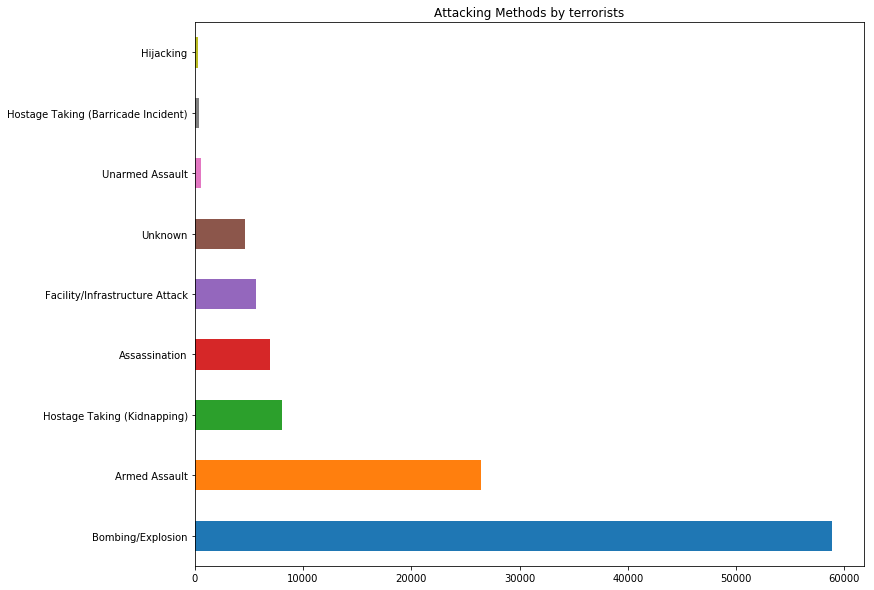

In [20]:
#attack
attack = pd.DataFrame(terrorismdf_pd, columns = ['Attack']) 
count_attack = attack.stack().value_counts()
ax = count_attack.plot(kind = 'barh',
                              title = 'Attacking Methods by terrorists',
                             fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('')

# Region

Text(0,0.5,'')

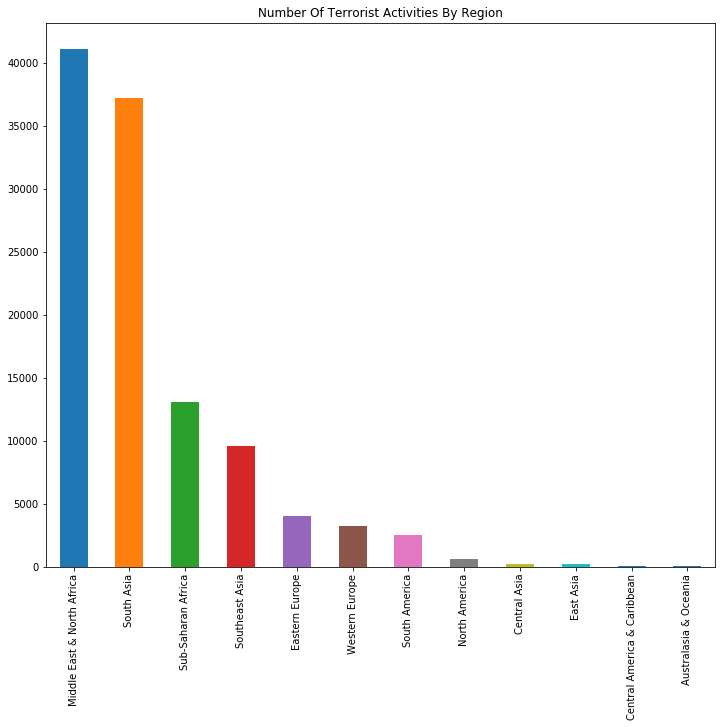

In [21]:
# Region of attack
region = pd.DataFrame(terrorismdf_pd, columns = ['Region']) 
count_region = region.stack().value_counts()
ax = count_region.plot(kind = 'bar',
                              title = 'Number Of Terrorist Activities By Region',
                              fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('')

# Country

Text(0,0.5,'')

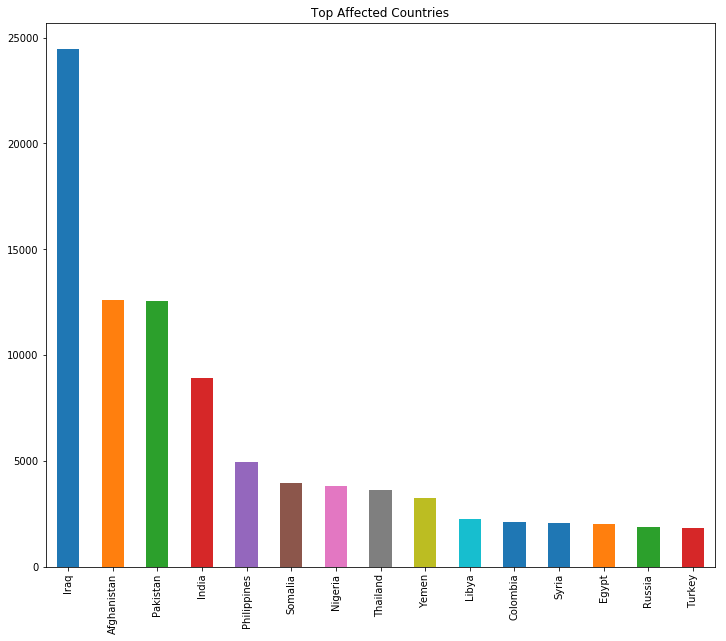

In [24]:
# country of attack
country = pd.DataFrame(terrorismdf_pd, columns = ['Country']) 
count_country = country.stack().value_counts()[:15]
ax = count_country.plot(kind = 'bar',
                              title = 'Top Affected Countries',
                              fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('')

# Region Vs Attack type

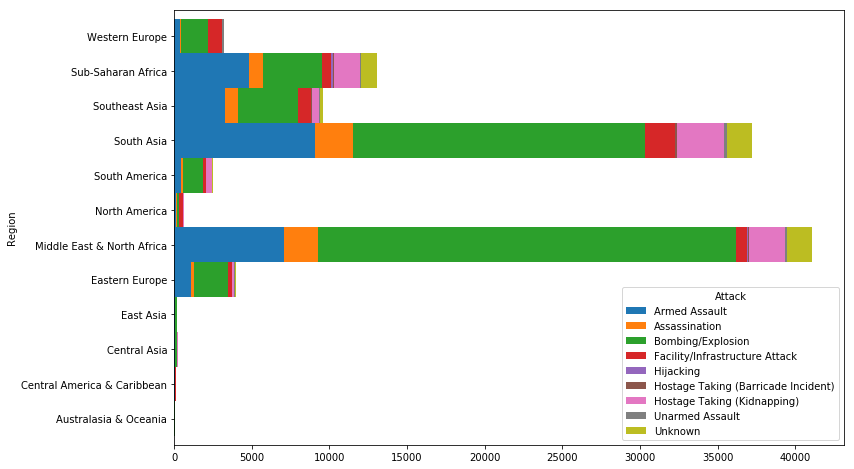

In [23]:
#Region vs Attack
pd.crosstab(terrorismdf_pd.Region,terrorismdf_pd.Attack).plot.barh(stacked=True,width=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Country Vs Attack type

In [26]:
#top countries for country wise cross tab
topcountries = terrorismdf_pd['Country'].value_counts()[:15]
print(topcountries)

Iraq           24475
Afghanistan    12607
Pakistan       12551
India           8918
Philippines     4920
Somalia         3973
Nigeria         3826
Thailand        3623
Yemen           3240
Libya           2235
Colombia        2104
Syria           2055
Egypt           2004
Russia          1866
Turkey          1803
Name: Country, dtype: int64


In [27]:
topcountrieslist = ['Iraq','Afghanistan', 'Pakistan', 'India', 'Philippines', 'Somalia', 'Nigeria', 'Thailand', 'Yemen', 'Libya', 'Colombia', 'Syria', 'Egypt', 'Russia', 'Turkey']

In [28]:
#dataset for Top countries list
topcountriesdf = terrorismdf_pd
print(topcountriesdf.shape)

(111856, 16)


In [29]:
topcountriesdf = topcountriesdf[topcountriesdf['Country'].isin(topcountrieslist)]
print(topcountriesdf.shape)

(90200, 16)


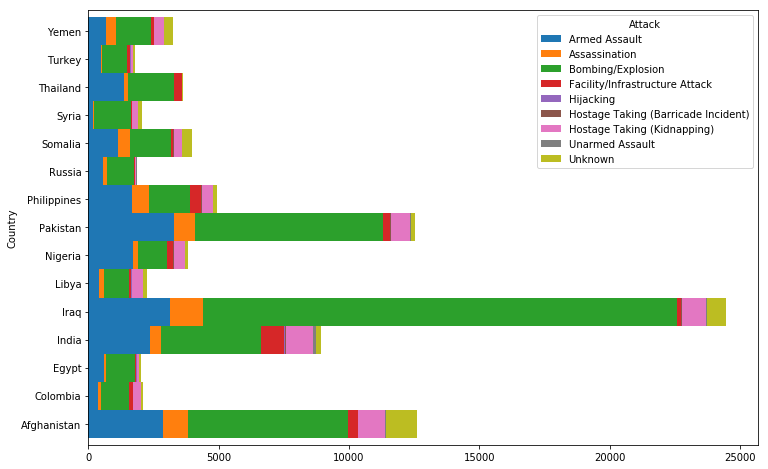

In [30]:
#Country vs Attack
pd.crosstab(topcountriesdf.Country,topcountriesdf.Attack).plot.barh(stacked=True,width=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Yearly terrorist activity trends in Countries

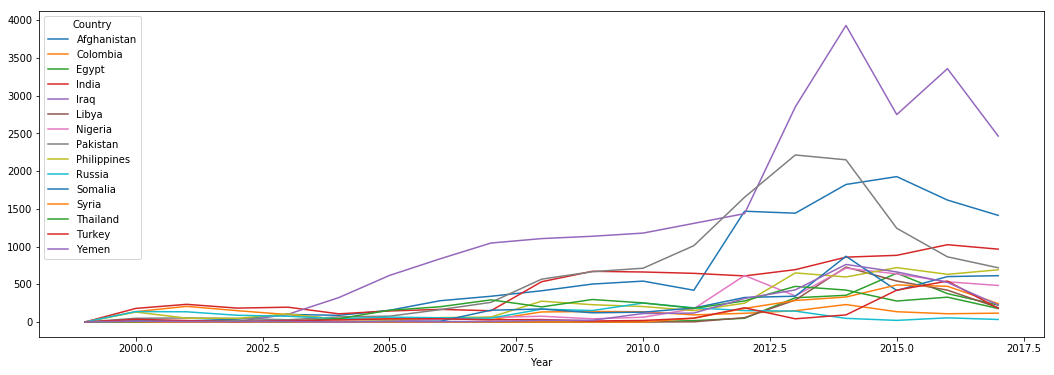

In [32]:
#yearly terroris activity trend in countries
terrorist_country = pd.crosstab(topcountriesdf.Year,topcountriesdf.Country)
terrorist_country.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Missing Value Exploration

In [60]:
#Missing value
print(terrorismdf_pd.isnull().sum())

Year                  0
Month                 0
Date                  0
Country               0
Region                0
Province             10
City                434
Attack                0
Target                0
Nationality        1116
Group                 0
Individual            0
Weapon                0
Weapon Detail     58578
Ishostkid             3
Ransom           101900
dtype: int64


In [66]:
#Missing value
columns_missingvalues = ['Ransom','Weapon Detail']
terrorismdf_pd.drop(columns_missingvalues, inplace=True, axis=1)
print(terrorismdf_pd.columns)
print(terrorismdf_pd.isnull().sum())

Index(['Year', 'Month', 'Date', 'Country', 'Region', 'Province', 'City',
       'Attack', 'Target', 'Nationality', 'Group', 'Individual', 'Weapon',
       'Ishostkid'],
      dtype='object')
Year              0
Month             0
Date              0
Country           0
Region            0
Province         10
City            434
Attack            0
Target            0
Nationality    1116
Group             0
Individual        0
Weapon            0
Ishostkid         3
dtype: int64


In [72]:
# fill missing values with mode column values
terrorismdf_pd = terrorismdf_pd.fillna(terrorismdf_pd.mode().iloc[0])
# count the number of NaN values in each column
print(terrorismdf_pd.isnull().sum())

Year           0
Month          0
Date           0
Country        0
Region         0
Province       0
City           0
Attack         0
Target         0
Nationality    0
Group          0
Individual     0
Weapon         0
Ishostkid      0
dtype: int64


# Outliers and Extremes

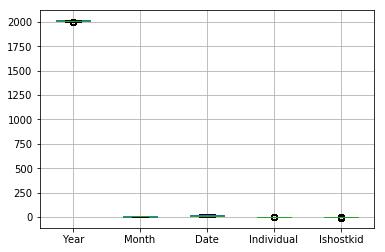

In [85]:
terrorismdf_pd.boxplot()

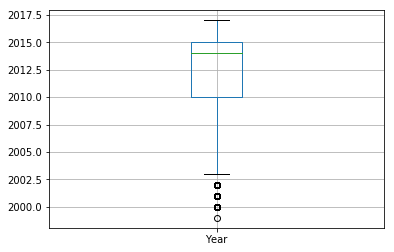

In [86]:
terrorismdf_pd.boxplot(column = 'Year')

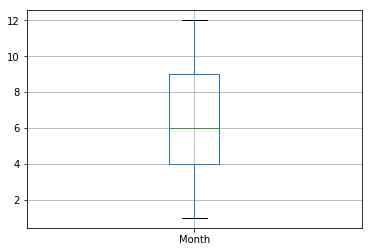

In [87]:
terrorismdf_pd.boxplot(column = 'Month')

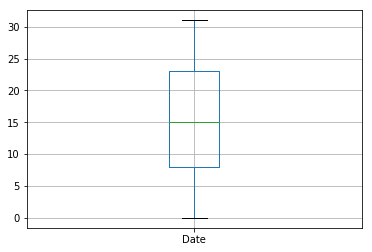

In [88]:
terrorismdf_pd.boxplot(column = 'Date')

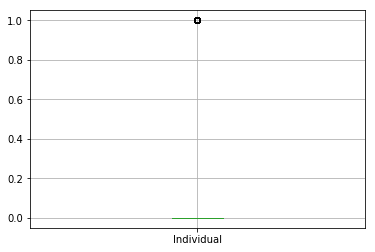

In [89]:
terrorismdf_pd.boxplot(column = 'Individual')

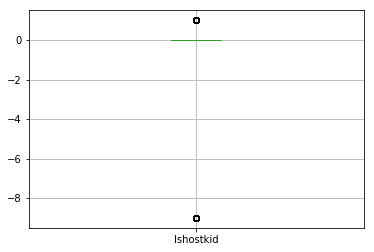

In [90]:
terrorismdf_pd.boxplot(column = 'Ishostkid')

# Treating Outliers and Extremes

In [93]:
columns = ['Year', 'Month', 'Date','Individual','Ishostkid']
for column in columns:
    median = terrorismdf_pd.loc[:, column].median()
    Q1 = terrorismdf_pd[column].quantile(0.25)
    Q3 = terrorismdf_pd[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerRange = Q1 - 1.5*IQR
    upperRange = Q3 + 1.5*IQR
    terrorismdf_pd[column] = terrorismdf_pd[column].mask(terrorismdf_pd[column] > upperRange, other=median)
    terrorismdf_pd[column] = terrorismdf_pd[column].mask(terrorismdf_pd[column] < lowerRange, other=median)

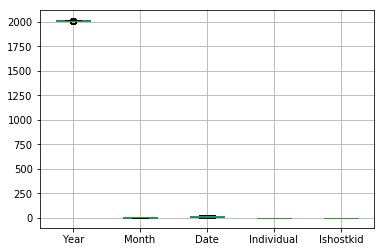

In [94]:
terrorismdf_pd.boxplot()

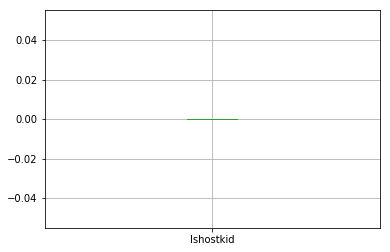

In [95]:
terrorismdf_pd.boxplot(column = 'Ishostkid')

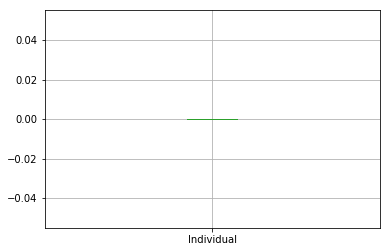

In [96]:
terrorismdf_pd.boxplot(column = 'Individual')

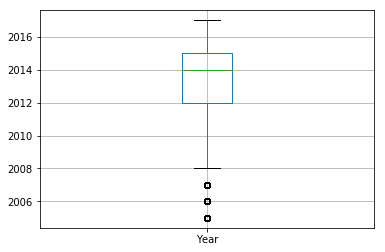

In [97]:
terrorismdf_pd.boxplot(column = 'Year')

# Exporting the complete dataset after missing value imputation and treating outliers and extremes

In [99]:
clean_data = terrorismdf_pd.to_csv('Complete_dataset.csv', index = None, header=True)